#House Prices: Limpieza de las bases de datos

In [ ]:
!python --version

Python 3.10.12


In [ ]:
!apt-get install python3.11

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3.11 is already the newest version (3.11.5-1+jammy1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
!python3.11 --version

Python 3.11.5


In [ ]:
import sys
sys.path.pop(0)
sys.path.insert(0, '/usr/bin/python3.11')

##Librerias

In [ ]:
#instalar kaggle
!pip install -q kaggle

In [ ]:
#libreria
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#libreria
from google.colab import files
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

##Kaggle

In [ ]:
files.upload() #kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melfadanelli","key":"548fca76b229130eb440fc33553b8bdb"}'}

In [ ]:
#configure kaggle library
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           7090        221  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          17298        562  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           2089         53  1.0              
josephinelsy/spotify-top-hit-playlist-2010-2022            Spotify Top Hit Playlist (2010-2022)           210K

In [ ]:
#ejemplo descargar base de datos
!kaggle competitions download -c house-prices-advanced-regression-techniques

100% 199k/199k [00:00<00:00, 521kB/s]
100% 199k/199k [00:00<00:00, 520kB/s]


In [ ]:
#descomprimir un archivo .zip
!unzip house-prices-advanced-regression-techniques.zip -d "/content/kaggledb"

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: /content/kaggledb/data_description.txt  
  inflating: /content/kaggledb/sample_submission.csv  
  inflating: /content/kaggledb/test.csv  
  inflating: /content/kaggledb/train.csv  


##Carga de las bases de datos

In [ ]:
#load database
df_train = pd.read_csv("/content/kaggledb/train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df_test = pd.read_csv("/content/kaggledb/train.csv")

In [ ]:
#load database
df_test = pd.read_csv("/content/kaggledb/test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [ ]:
#load database
df = pd.read_csv("/content/kaggledb/sample_submission.csv")
df.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

##Diccionario

| Variable | Tipo | Categoría |
|----------|----------|----------|
| ID    | Int   | Numérico discreto   |
| MSSubClass    | Int   | Numérico discreto   |
| MSZoning    | Object   | Categórico Nominal   |
| LotFrontage   | Float   | Numérico Continuo   |
| LotArea    | Int   | Numérico discreto   |
| Street    | Object   | Categórico Nominal   |
| Alley    | Object   | Categórico Nominal   |
| LotShape    | Object   | Categórico Nominal   |
| LandCountour    | Object   | Categórico Nominal   |
| Utilities   | Object   | Categórico Nominal   |
| LotConfig    | Object   | Categórico Nominal   |
| LandSlope    | Object   | Categórico Nominal   |
| Neighborhood    | Object   | Categórico Nominal   |
| Condition1    | Object   | Categórico Nominal   |
| Condition2    | Object   | Categórico Nominal   |
| BldgType    | Object   | Categórico Nominal   |
| HouseStyle   | Object   | Categórico Nominal   |
| OverallQual    | Int   | Numérico Discreto   |
| OverallCond    | Int   | Numérico Discreto   |
| YearBuilt    | Int   | Numérico Discreto   |
| YearRemodAdd    | Int   | Numérico Discreto   |
| RoofStyle    | Object   | Categórico Nominal   |
| RoofMalt    | Object   | Categórico Nominal   |
| Exterior1st    | Object   | Categórico Nominal   |
| Exterior2nd    | Object   | Categórico Nominal   |
| MasVnrType   | Object   | Categórico Nominal   |
| MasVnrArea    | Float   | Numérico Continuo   |
| ExterQual    | Object   | Categórico Nominal   |
| ExterCond    | Object   | Categórico Nominal   |
| Foundation    | Object   | Categórico Nominal   |
| BsmtQual    | Object   | Categórico Ordinal   |
| BsmtCond    | Object   | Categórico Ordinal  |
| BsmtExposure   | Object   | Categórico Ordinal   |
| BsmtFinType1    | Object   | Categórico Ordinal  |
| BsmtFinSF1    | Int   | Numérico Discreto   |
| BsmtFinType2    | Object   | Categórico Ordinal   |
| BsmtFinSF2    | int   | Numérico Discreto   |
| BsmtUnfSF   | int   | Numérico Discreto |
| TotalBsmtSF    | int   | Numérico Discreto   |
| Heating    | Object   | Categórico Nominal   |
| HeatingQC    | Object   | Categórico Ordinal    |
| CentralAir    | Object   | Categórico Nominal    |
| Electrical    | Object   | Categórico Nominal   |
| 1stFlrSF    | int   | Numérico Discreto   |
| 2ndFlrSF    | int   | Numérico Discreto   |
| LowQualFinSF   | int   | Numérico Discreto   |
| GrLivArea    | int   | Numérico Discreto   |
| BsmtFullBath    | int   | Numérico Discreto   |
| BsmtHalfBath   | int   | Numérico Discreto   |
| FullBath    | int   | Numérico Discreto   |
| HalfBath    | int   | Numérico Discreto   |
| BedroomAbvGr   | int   | Numérico Discreto   |
| KitchenAbvGr    | int   | Numérico Discreto   |
| KitchenQual    | object   | Categórico Ordinal   |
| TotRmsAbvGrd   | int   | Numérico Discreto   |
| Functional    | object   | Categórico Nominal   |
| Fireplaces    | int   | Numérico Discreto   |
| FireplaceQu   | object   | Categórico Ordinal   |
| GarageType    | object   | Categórico Nominal   |
| GarageYrBlt    | float   | Numérico Continuo   |
| GarageFinish   | object   | Categórico Nominal   |
| GarageCars    | int   | Numérico Discreto    |
| GarageArea    | int   | Numérico Discreto   |
| GarageQual   | object   | Categórico Ordinal   |
| GarageCond   | object   | Categórico Ordinal   |
| PavedDrive    | object   | Categórico Nominal   |
| WoodDeckSF   | int   | Numérico Discreto   |
| OpenPorchSF   | int   | Numérico Discreto   |
| EnclosedPorch   | int   | Numérico Discreto   |
| 3SsnPorch   | int   | Numérico Discreto   |
| ScreenPorch   | int   | Numérico Discreto   |
| PoolArea   | int   | Numérico Discreto   |
| PoolQC   | object   | Categórico Ordinal   |
| Fence   | object   | Categórico Ordinal   |
| MiscFeature    | object   | Categórico Nominal   |
| MiscVal   | int   | Numérico Discreto   |
| MoSold   | int   | Numérico Discreto   |
| YrSold   | int   | Numérico Discreto   |
| SaleType   | object   | Categórico Nominal   |
| SaleCondition    | object   | Categórico Nominal   |
| SalePrice   | int   | Numérico Discreto   |

##Limpieza: Train

###Información

Revisando previamente nuestra base de datos y analizando el diccionario que se proporciona en la competencia de kaggle identificamos que en varias de las categorías hay valores NA, los cuales, en su mayoría pertenecen a NA: No hay ese elemento en la casa en cuestión, por lo que se presenta la siguiente tabla de las variables con NA values y se identifican si corresponden a la categoría o son valores nulos.

| Variable | NA/Null | Cantidad de NA |
|----------|----------|----------|
| LotFrontage   | Null   | 259   |
| Alley    | NA: No access   | 1369   |
| MasVnrType   | Null   | 8   |
| MasVnrArea    | Null   | 8  |
| BsmtQual    | NA: No Bsmt | 37 |
| BsmtCond    | NA: No Bsmt | 37 |
| BsmtExposure | NA: No Bsmt | 38 |
| BsmtFinType1 | NA: No Bsmt   | 37 |
| BsmtFinType2   | NA: No Bsmt  | 38|
| Electrical    | Null   | 1   |
| FireplaceQu | NA: No Fireplace|690|
| GarageType | NA: No Garage  | 81 |
| GarageYrBlt  | NA: No Garage | 81 |
| GarageFinish | NA: No Garage | 81 |
| GarageQual   | NA: No Garage | 81 |
| GarageCond   | NA: No Garage | 81 |
| PoolQC  | NA: No Pool | 1453 |
| Fence   | NA: No Fence | 1179 |
| MiscFeature | NA: No Misc | 1406 |
| MiscVal   | Null   | 2  |

Por lo anterior, al ser menos los datos NULL, se remplazarán los valores NA de la base de datos por un str "NA_Valor" con el objetivo de que no se identifiquen como Null y así solo poder procesar los correspondientes.

In [ ]:
#replace de los NA
df_train = df_train.replace([np.nan], ["NA_Valor"])

In [ ]:
#Dimensiones de la base de datos
df_train.shape

(1460, 81)

In [ ]:
#pd.set_option('display.max_rows', None)


In [ ]:
#Tipos de variables en el dataset
df_train.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage      object
LotArea           int64
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 81, dtype: object

Tras el replace de los NA por NA_Valores y segun el diccionario previo, la conversión afectó a las siguientes variables, las cuales posteriormente se convertiran nuevamente al tipo de variable que les corresponde.

| Variable | Tipo Actual| Tipo Real |
|----------|----------|----------|
| LotFrontage | Object   | Float  |
| MasVnrArea    | Object   |  Float |


In [ ]:
#valores nulos
df_train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Como se observa, no contamos con ningún valor nulo en la base de datos gracias al replace que se realizó.

In [ ]:
#valores duplicados en los registros de la base de datos
duplicates = df_train.duplicated(subset=None).to_numpy()
len(duplicates)

1460

In [ ]:
#ciclo que suma 1 si no hay valores duplicados en cada entrada del df
cont=0
for i in range (0,1460):
  if duplicates[i]==False:
    cont +=1
print(cont)

1460


In [ ]:
#array con el nombre de las variables
train_columns = df_train.columns.to_numpy()
len(train_columns)

81

###Conversión tipo de variables

Se realizará la conversión de las siguientes variables para posteriormente tratar sus datos nulos.

| Variable | Tipo Actual| Tipo Real |
|----------|----------|----------|
| LotFrontage | Object   | Float  |
| MasVnrArea    | Object   |  Float |


In [ ]:
df_train['LotFrontage'] = pd.to_numeric(df_train['LotFrontage'], errors='coerce')
df_train['MasVnrArea'] = pd.to_numeric(df_train['MasVnrArea'], errors='coerce')

In [ ]:
print(df_train['LotFrontage'].dtypes)
print(df_train['MasVnrArea'].dtypes)

float64
float64


###Tratamiento de Datos Nulos

Las variables con datos nulos a tratar son las siguientes:

| Variable | Cantidad de Null| Tratamiento |
|----------|----------|----------|
| LotFrontage | 259   | Mediana |
| MasVnrType    | 8   | Eliminar |
| MasVnrArea    | 8   | Eliminar |
| Electrical    | 1   | Eliminar |
| MiscVal   | 2 | Eliminar |

De MasVnrType son los mismos 8 registros que MasVnrArea.

MiscVal se eliminaran los registros 874 y 1202 ya que no hay un MiscFeature en esas entradas.

In [ ]:
df_train['LotFrontage'].isna().sum()

259

In [ ]:
cont=0
for i in range (0,1460):
  if df_train["MasVnrType"].iloc[i]=="NA_Valor":
    cont +=1
print(cont)

8


In [ ]:
df_train['MasVnrArea'].isna().sum()

8

In [ ]:
cont=0
for i in range (0,1460):
  if df_train["Electrical"].iloc[i]=="NA_Valor":
    cont +=1
print(cont)

1


In [ ]:
df_train['MiscVal'].iloc[874]

0

In [ ]:
df_train['MiscVal'].iloc[1201]

0

In [ ]:
df_train.dropna(subset=["MasVnrArea"], inplace=True)

In [ ]:
df_train['MasVnrArea'].isna().sum()

0

In [ ]:
cont=0
for i in range (0,1452):
  if df_train["MasVnrType"].iloc[i]=="NA_Valor":
    cont +=1
print(cont)

0


In [ ]:
cont=0
for i in range (0,1452):
  if df_train["Electrical"].iloc[i]=="NA_Valor":
    cont +=1
print(cont)

1


In [ ]:
df_train['LotFrontage'].isna().sum()

257

In [ ]:
df_train['MiscVal'].iloc[874]

0

In [ ]:
df_train['MiscVal'].iloc[1201]

0

In [ ]:
df_train = df_train.drop([874,1201], axis=0)

In [ ]:
df_train.shape

(1450, 81)

In [ ]:
filas_filtradas = df_train[df_train['Electrical'] == "NA_Valor"]
filas_filtradas

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley  \
1379  1380          80       RL         73.0     9735   Pave  NA_Valor   

     LotShape LandContour Utilities  ... PoolArea    PoolQC     Fence  \
1379      Reg         Lvl    AllPub  ...        0  NA_Valor  NA_Valor   

     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1379    NA_Valor       0      5   2008        WD         Normal     167500  

[1 rows x 81 columns]

In [ ]:
df_train = df_train.drop([1379], axis=0)

In [ ]:
df_train.shape

(1449, 81)

In [ ]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

In [ ]:
df_train['LotFrontage'].isna().sum()

0

###OneHotEncoder
Conversión de valores categóricos a numéricos

####Replace: Variables Ordinales

In [ ]:
reemplazo = {'BsmtQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'BsmtCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'GarageQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'GarageCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'PoolQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0}}

# Aplicar el reemplazo a las columnas especificadas
df_train.replace(reemplazo, inplace=True)


In [ ]:
reemplazo = {'ExterQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'ExterCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'KitchenQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1}}

# Aplicar el reemplazo a las columnas especificadas
df_train.replace(reemplazo, inplace=True)

In [ ]:
reemplazo = {'LotShape': {"Reg": 4, "IR1": 3, "IR2": 2, "IR3":1},
             'Utilities': {"AllPub": 4, "NoSewr": 3, "NoSeWa":2, "ELO": 1},
             'LandSlope': {"Gtl": 3, "Mod":2, "Sev": 1},
             'BsmtFinType1': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ":2, "Unf": 1,"NA_Valor":0},
             'BsmtFinType2': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ":2, "Unf": 1,"NA_Valor":0},
             'BsmtExposure': {"Gd": 4, "Av": 3, "Mn":2, "No": 1, "NA_Valor":0},
             'GarageFinish': {"Fin": 3, "RFn":2, "Unf": 1, "NA_Valor":0},
             'PavedDrive': {"Y":2, "P": 1, "N":0},
             'Fence': {"GdPrv": 4, "MnPrv": 3, "GdWo":2, "MnWw": 1, "NA_Valor":0},
             'Functional': {"Typ": 8, "Min1": 7, "Min2": 6, "Mod": 5, "Maj1": 4, "Maj2": 3, "Sev":2, "Sal": 1},
             'CentralAir': {"Y":1, "N":0},
             "GarageYrBlt": {"NA_Valor":0}}

# Aplicar el reemplazo a las columnas especificadas
df_train.replace(reemplazo, inplace=True)

In [ ]:
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('Int64')

In [ ]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [ ]:
df_train.drop(["Id"], axis=1, inplace=True)

###Matriz de correlaciones (selección de variables numéricas)

In [ ]:
numericas = df_train.select_dtypes(include=['int64','float64'])

<Axes: >

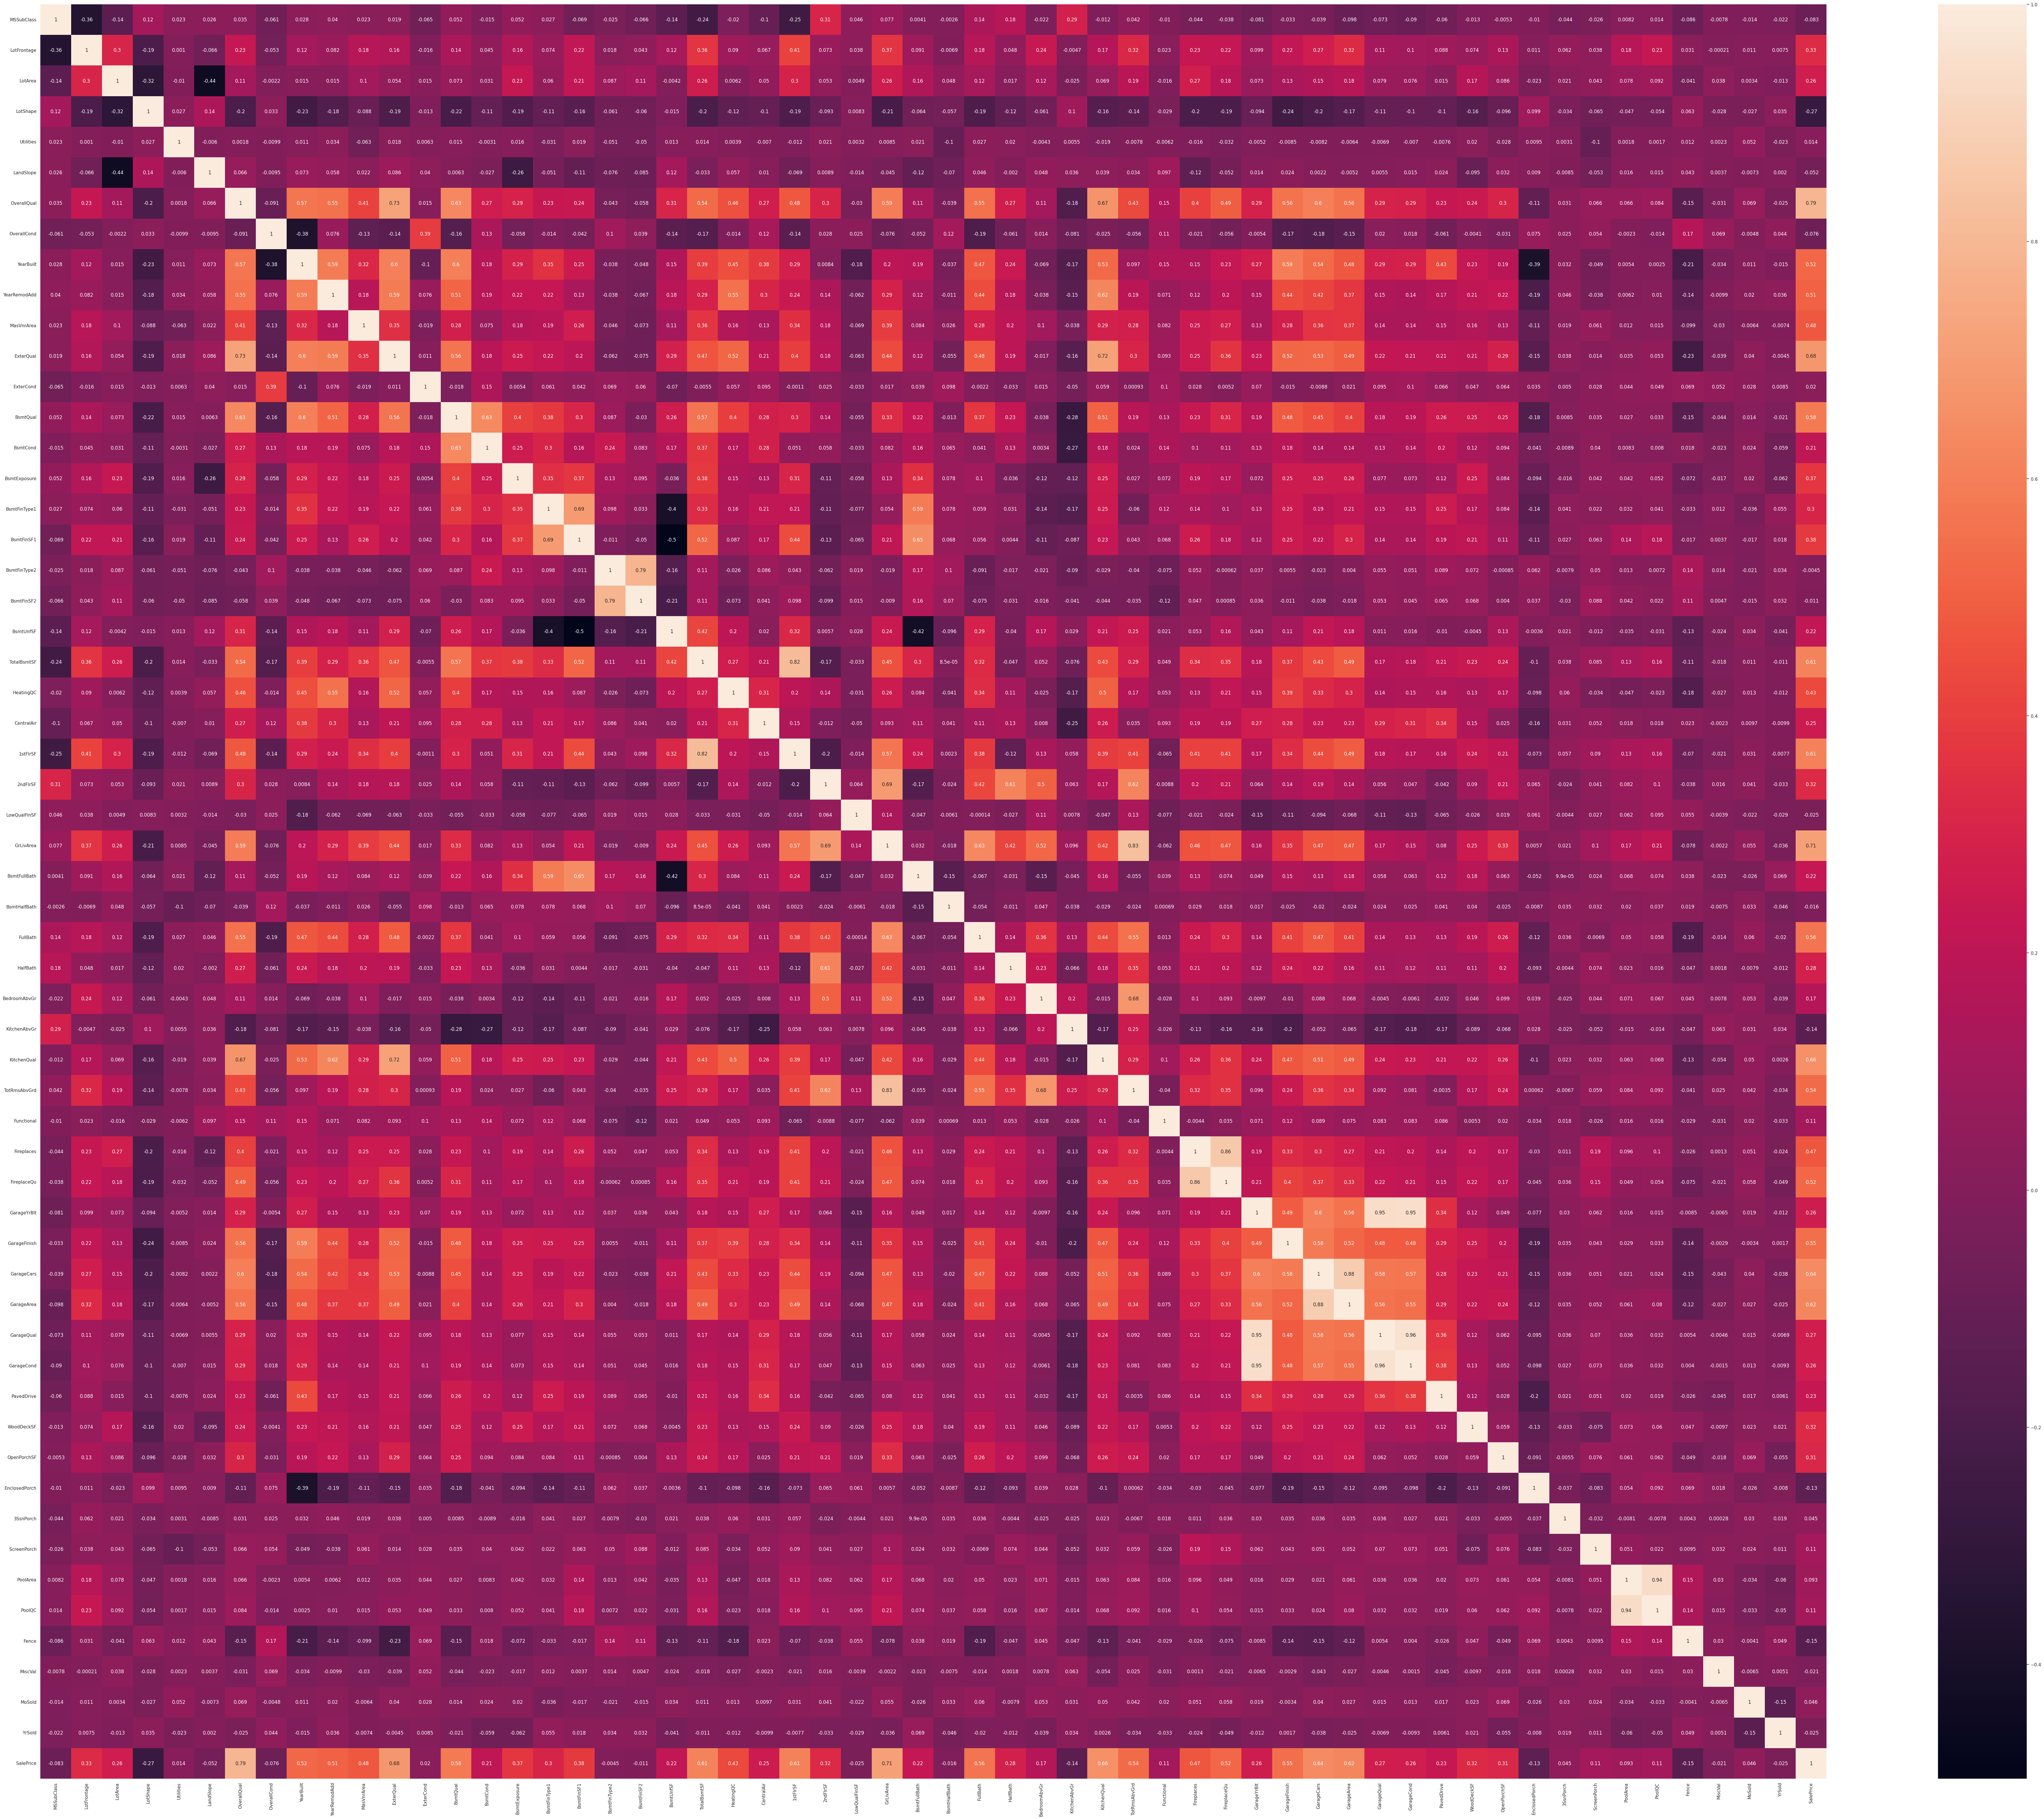

In [ ]:
sns.set(rc = {'figure.figsize':(100,80)})
sns.heatmap(numericas.corr(), annot=True)

In [ ]:
correlations = df_train.corr()
correlation_with_target = correlations['SalePrice'].abs()
threshold = 0.4  # Establece un umbral de correlación deseado
relevant_features = correlation_with_target[correlation_with_target >= threshold]

selected_features = relevant_features.index.tolist()

# Crear un nuevo DataFrame con solo las características seleccionadas
df_selected_features = df_train[selected_features]

<ipython-input-59-8aad6295a1da>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df_train.corr()


In [ ]:
df_selected_features

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  BsmtQual  \
0               7       2003          2003       196.0          4         4   
1               6       1976          1976         0.0          3         4   
2               7       2001          2002       162.0          4         4   
3               7       1915          1970         0.0          3         3   
4               8       2000          2000       350.0          4         4   
...           ...        ...           ...         ...        ...       ...   
1455            6       1999          2000         0.0          3         4   
1456            6       1978          1988       119.0          3         4   
1457            7       1941          2006         0.0          5         3   
1458            5       1950          1996         0.0          3         3   
1459            5       1965          1965         0.0          4         3   

      TotalBsmtSF  HeatingQC  1stFlrSF  GrLivArea  FullBath  KitchenQual  \
0             856          5       856       1710         2            4   
1            1262          5      1262       1262         2            3   
2             920          5       920       1786         2            4   
3             756          4       961       1717         1            4   
4            1145          5      1145       2198         2            4   
...           ...        ...       ...        ...       ...          ...   
1455          953          5       953       1647         2            3   
1456         1542          3      2073       2073         2            3   
1457         1152          5      1188       2340         2            4   
1458         1078          4      1078       1078         1            4   
1459         1256          4      1256       1256         1            3   

      TotRmsAbvGrd  Fireplaces  FireplaceQu  GarageFinish  GarageCars  \
0                8           0            0             2           2   
1                6           1            3             2           2   
2                6           1            3             2           2   
3                7           1            4             1           3   
4                9           1            3             2           3   
...            ...         ...          ...           ...         ...   
1455             7           1            3             2           2   
1456             7           2            3             1           2   
1457             9           2            4             2           1   
1458             5           0            0             1           1   
1459             6           0            0             3           1   

      GarageArea  SalePrice  
0            548     208500  
1            460     181500  
2            608     223500  
3            642     140000  
4            836     250000  
...          ...        ...  
1455         460     175000  
1456         500     210000  
1457         252     266500  
1458         240     142125  
1459         276     147500  

[1449 rows x 19 columns]

In [ ]:
df_selected_features.shape

(1449, 19)

In [ ]:
df_selected_features.columns.to_numpy()

array(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'SalePrice'], dtype=object)

####Dummy Variables: Variables Nominales (Selección y tratamiento)

In [ ]:
categoricas = df_train.select_dtypes(include=["object"])
categoricas = categoricas.columns.to_numpy()
categoricas

array(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical',
       'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype=object)

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


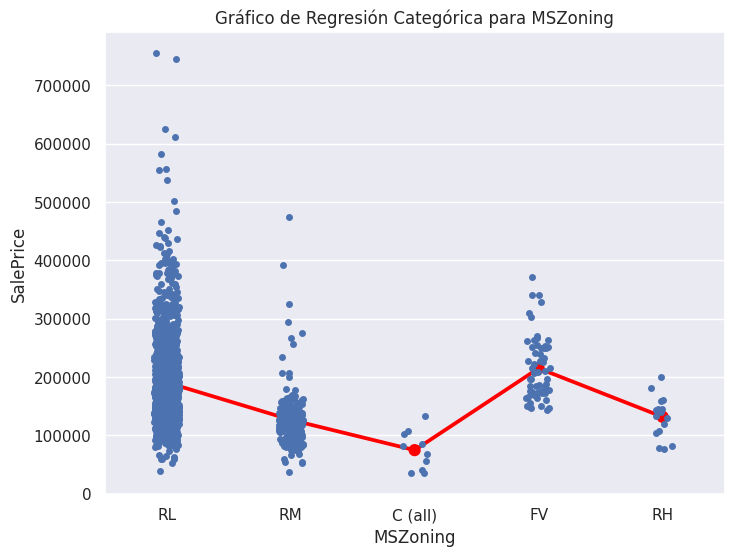

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


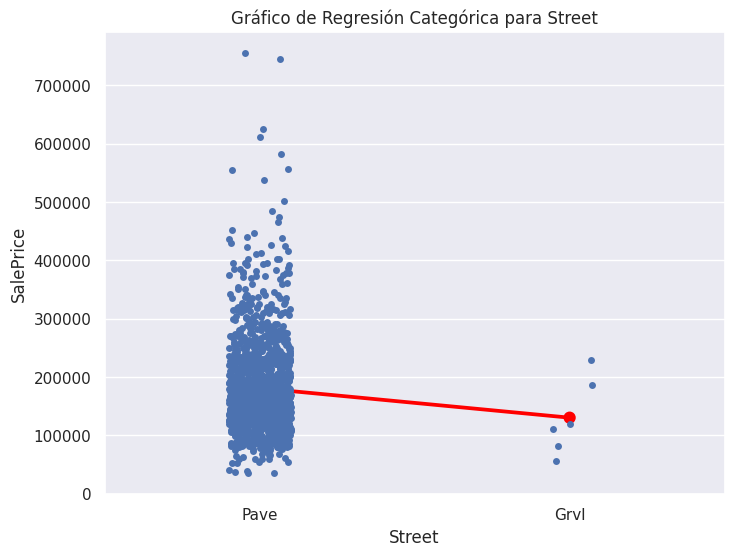

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


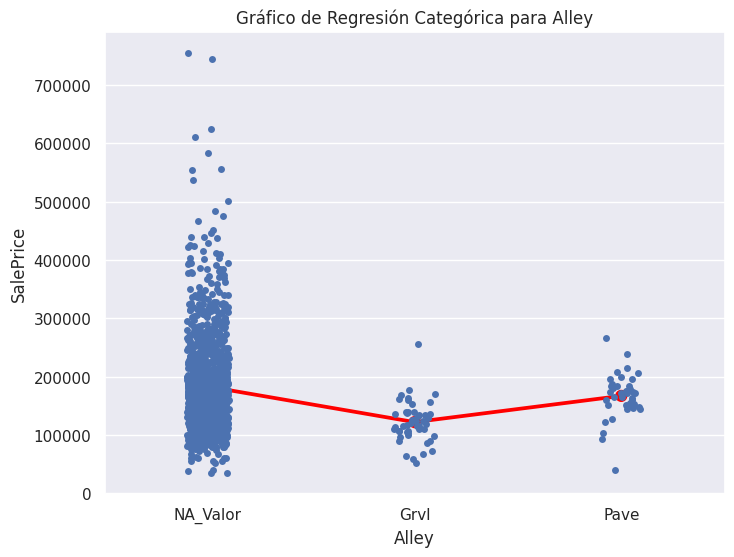

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


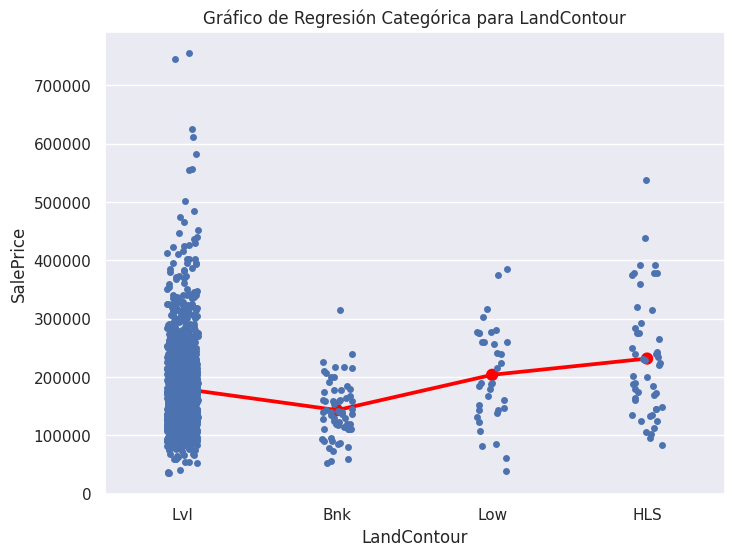

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


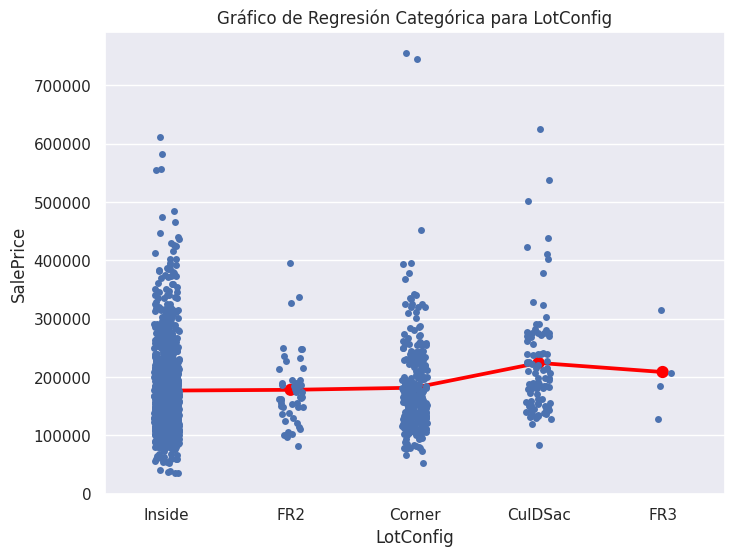

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


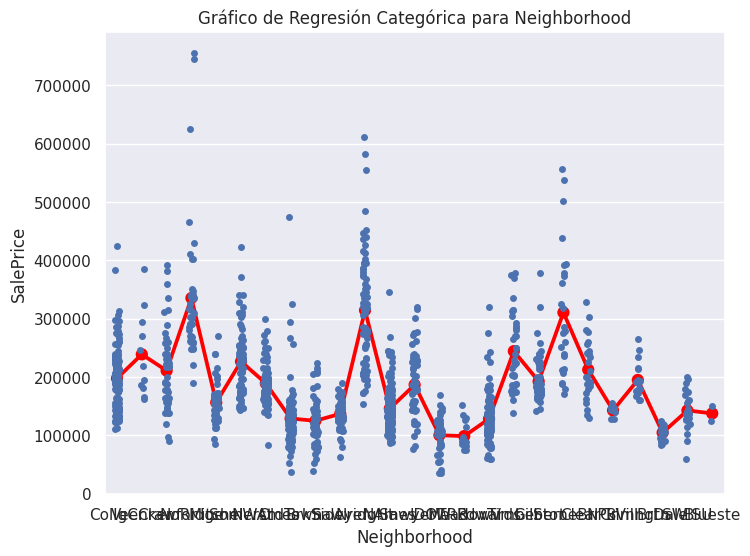

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


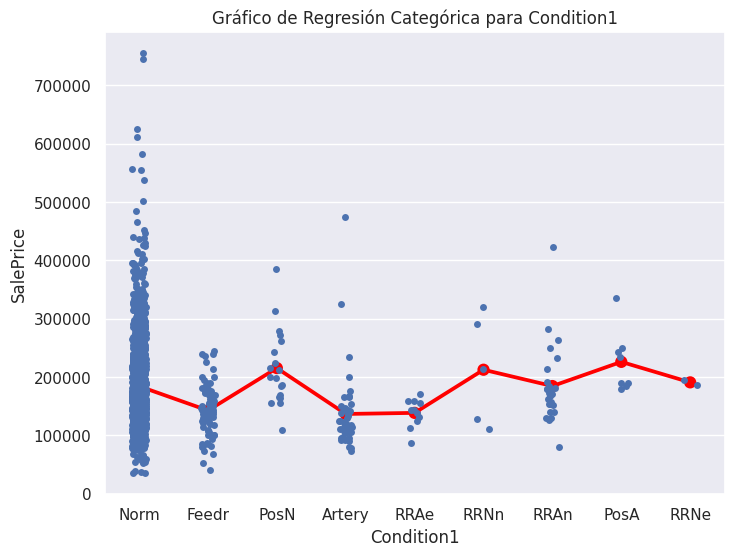

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


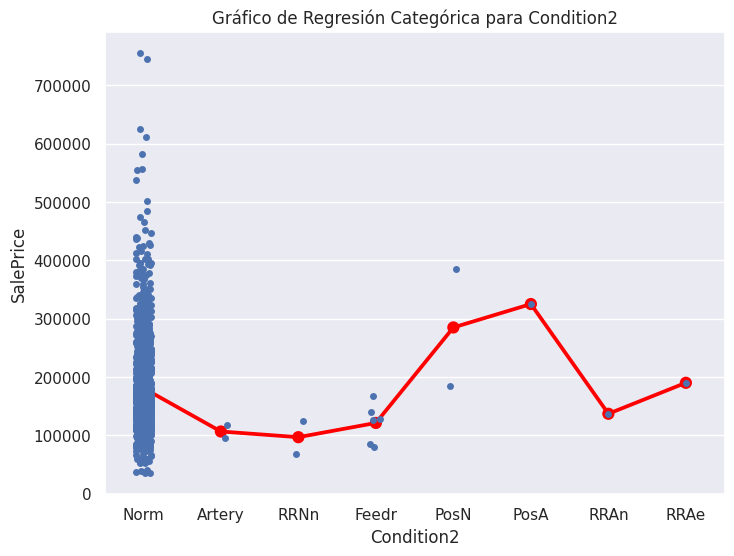

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


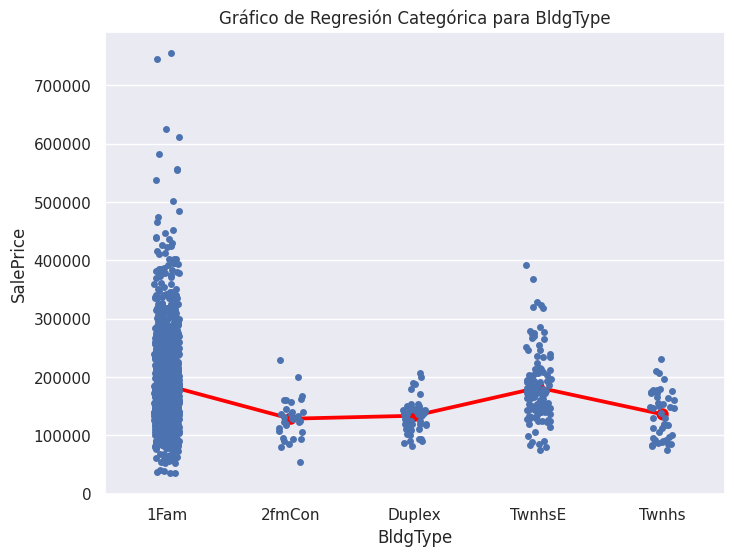

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


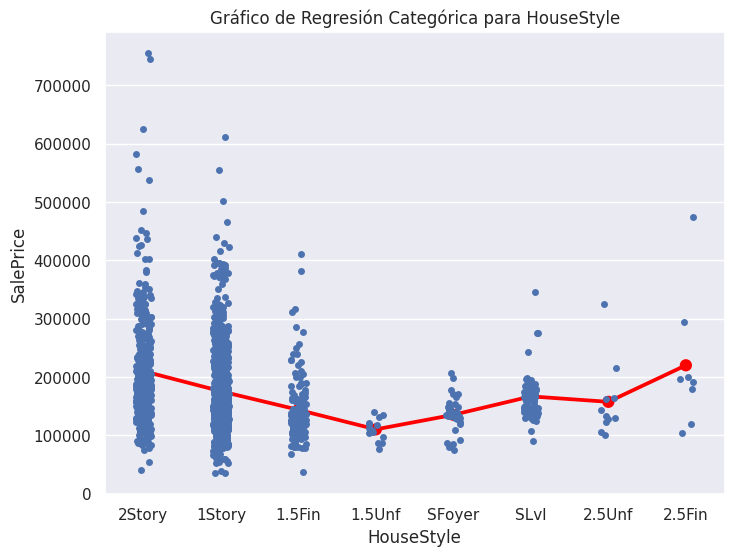

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


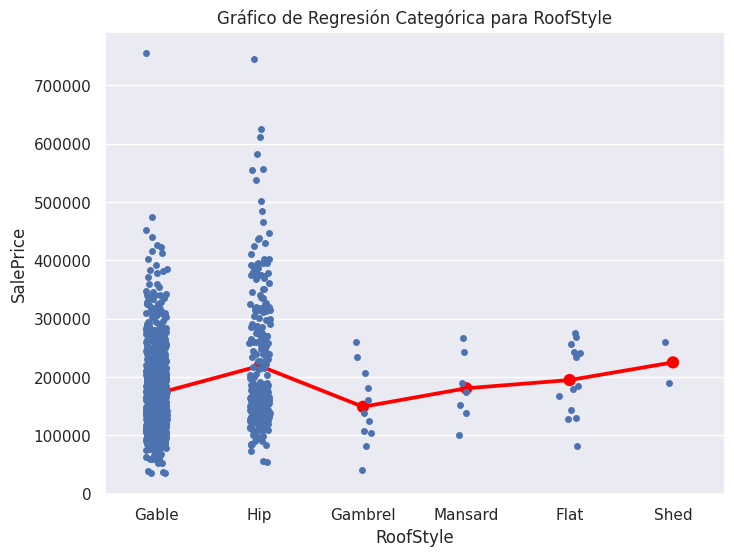

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


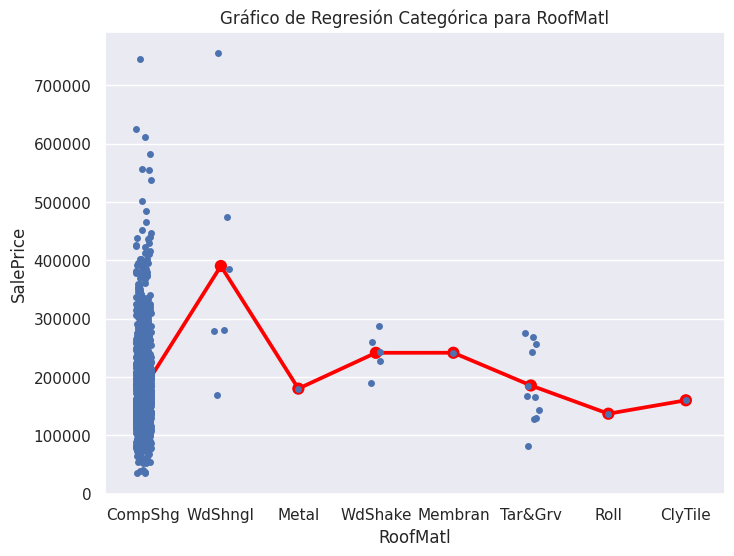

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


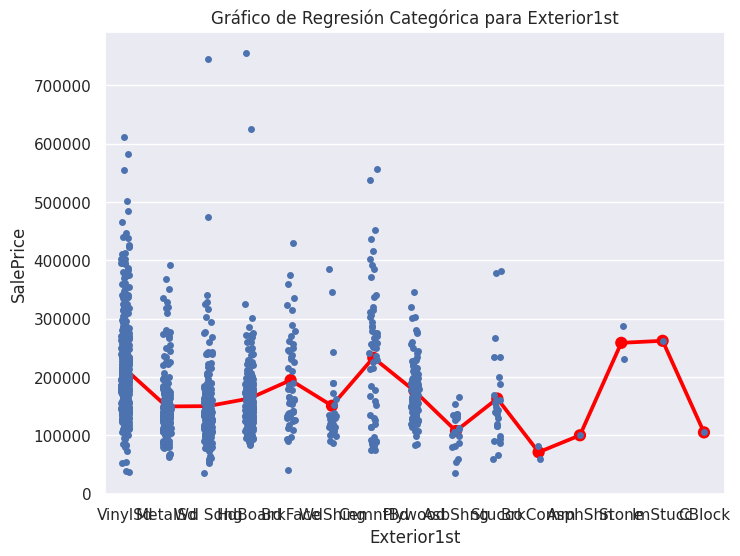

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


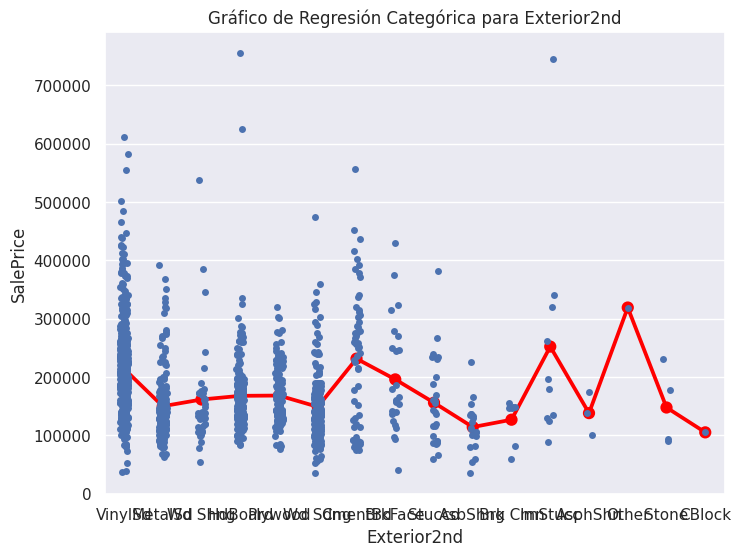

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


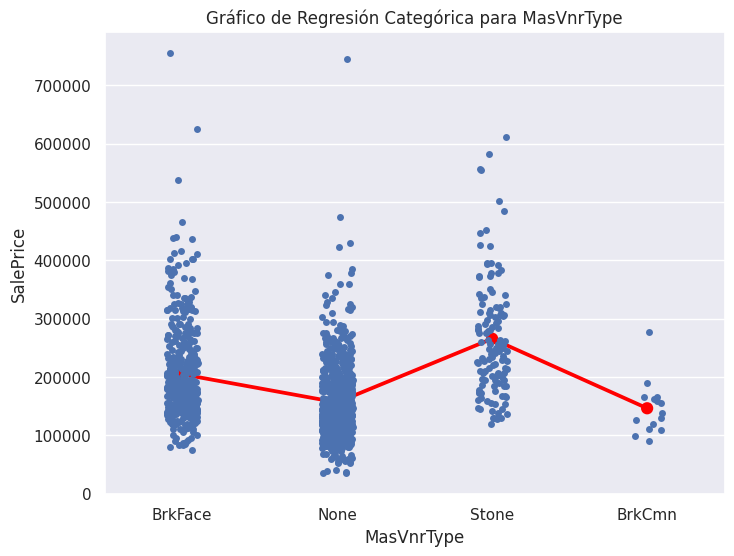

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


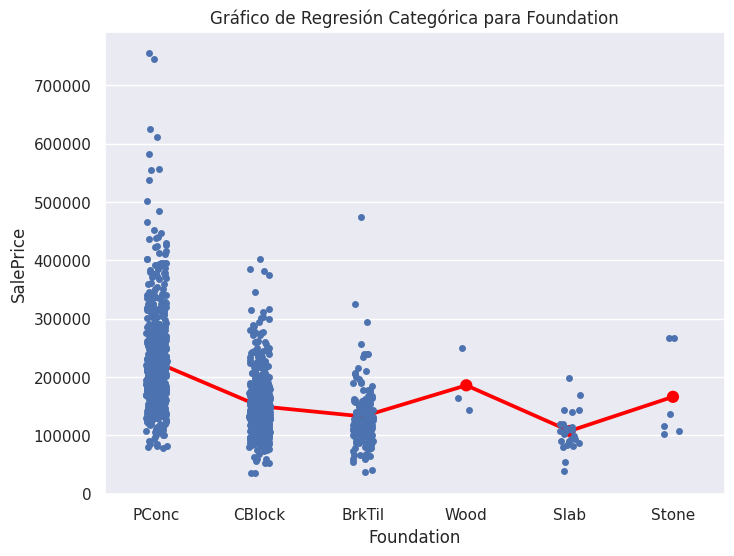

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


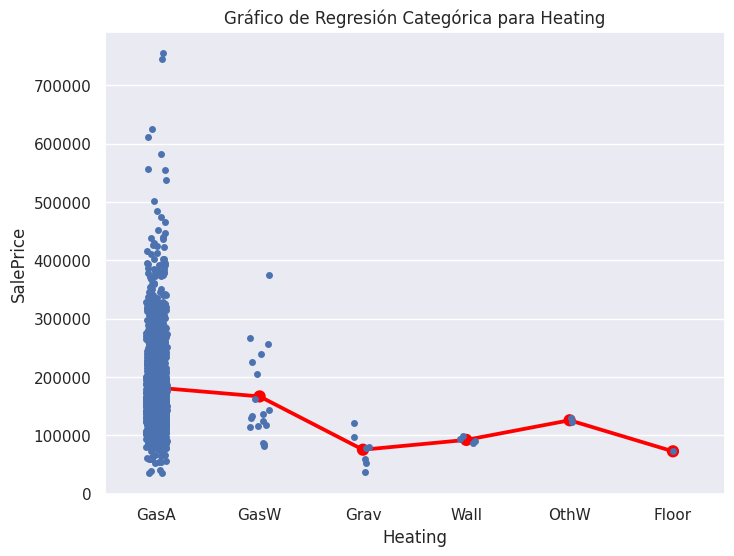

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


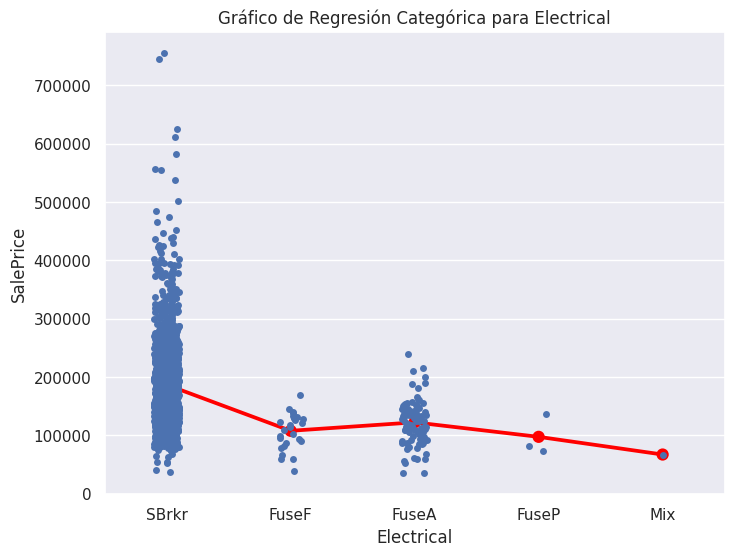

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


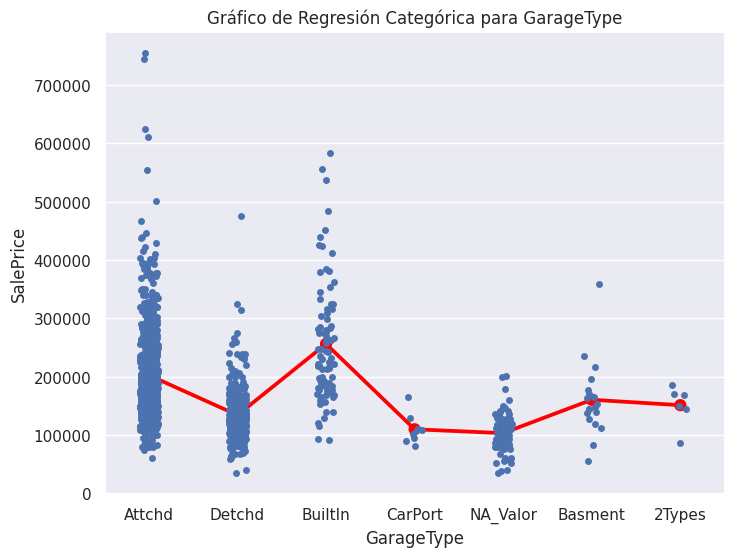

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


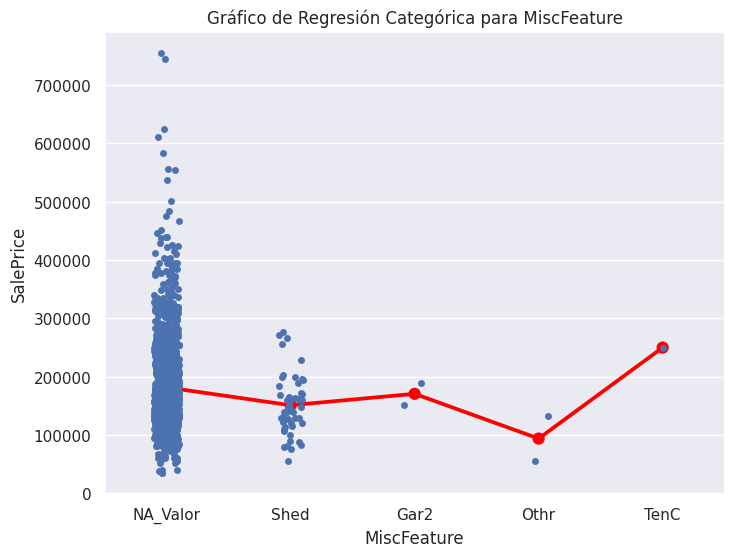

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


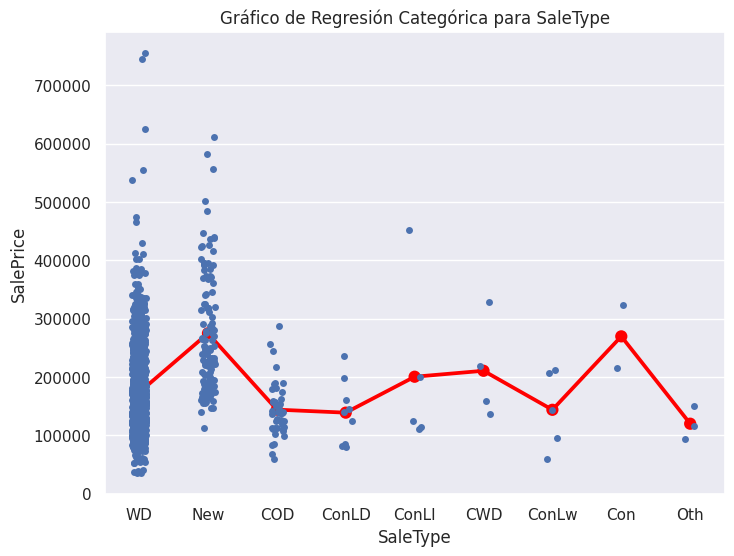

<ipython-input-64-2cab1795362a>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')


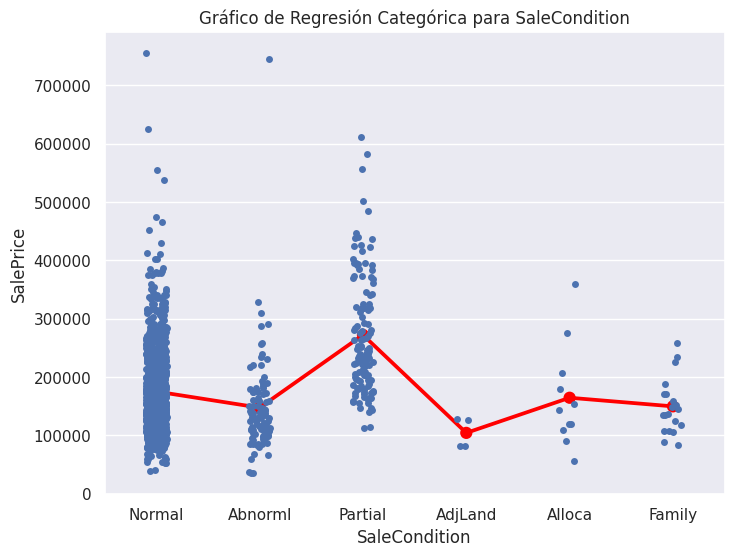

In [ ]:
# Crear un gráfico de regresión categórica para cada variable categórica
for categoria in categoricas:
    plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura
    sns.stripplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, jitter=True)
    sns.pointplot(x=df_train[categoria], y=df_train["SalePrice"], data=df_train, ci=None, color='red')
    plt.xlabel(categoria)  # Etiqueta del eje x
    plt.ylabel('SalePrice')  # Etiqueta del eje y
    plt.title(f'Gráfico de Regresión Categórica para {categoria}')  # Título del gráfico
    plt.show()  # Mostrar el gráfico

In [ ]:
df_prueba=df_train.drop(["Street","Alley","LandContour","LotConfig","Condition1","Condition2","RoofStyle","RoofMatl","Heating","Electrical","MiscFeature"], axis=1)
df_prueba.head()

MSSubClass MSZoning  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60       RL         65.0     8450         4          4          3   
1          20       RL         80.0     9600         4          4          3   
2          60       RL         68.0    11250         3          4          3   
3          70       RL         60.0     9550         3          4          3   
4          60       RL         84.0    14260         3          4          3   

  Neighborhood BldgType HouseStyle  ...  ScreenPorch  PoolArea  PoolQC  Fence  \
0      CollgCr     1Fam     2Story  ...            0         0       0      0   
1      Veenker     1Fam     1Story  ...            0         0       0      0   
2      CollgCr     1Fam     2Story  ...            0         0       0      0   
3      Crawfor     1Fam     2Story  ...            0         0       0      0   
4      NoRidge     1Fam     2Story  ...            0         0       0      0   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0      2   2008        WD         Normal     208500  
1       0      5   2007        WD         Normal     181500  
2       0      9   2008        WD         Normal     223500  
3       0      2   2006        WD        Abnorml     140000  
4       0     12   2008        WD         Normal     250000  

[5 rows x 69 columns]

In [ ]:
categoricas = df_prueba.select_dtypes(include=["object"])
categoricas = categoricas.columns.to_numpy()
categoricas

array(['MSZoning', 'Neighborhood', 'BldgType', 'HouseStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'GarageType', 'SaleType', 'SaleCondition'], dtype=object)

In [ ]:
dummies = [df_prueba]

for columna in categoricas:
    df_codificado = pd.get_dummies(df_prueba[columna], prefix=columna)
    dummies.append(df_codificado)

# Combinar los DataFrames codificados en uno solo
df_prueba = pd.concat(dummies, axis=1)
df_prueba.drop(categoricas, axis=1, inplace=True)

df_prueba=df_prueba.select_dtypes(include=['uint8'])
df_prueba.dtypes

MSZoning_C (all)         uint8
MSZoning_FV              uint8
MSZoning_RH              uint8
MSZoning_RL              uint8
MSZoning_RM              uint8
                         ...  
SaleCondition_AdjLand    uint8
SaleCondition_Alloca     uint8
SaleCondition_Family     uint8
SaleCondition_Normal     uint8
SaleCondition_Partial    uint8
Length: 106, dtype: object

In [ ]:
df_train=pd.concat([df_prueba, df_selected_features], axis=1)
df_train.shape

(1449, 125)

#Limpieza del Test

In [ ]:
#replace de los NA
df_test = df_test.replace([np.nan], ["NA_Valor"])

In [ ]:
df_test['GarageArea'].dtype

dtype('O')

In [ ]:
df_test['GarageCars'].dtype

dtype('O')

In [ ]:
df_test['KitchenQual'].dtype

dtype('O')

In [ ]:
df_test['TotalBsmtSF'].dtype

dtype('O')

In [ ]:
df_test['LotFrontage'].dtype

dtype('O')

In [ ]:
df_test['LotFrontage'] = pd.to_numeric(df_test['LotFrontage'], errors='coerce')
df_test['MasVnrArea'] = pd.to_numeric(df_test['MasVnrArea'], errors='coerce')
df_test['GarageArea'] = pd.to_numeric(df_test['GarageArea'], errors='coerce')
df_test['GarageCars'] = pd.to_numeric(df_test['GarageCars'], errors='coerce')
df_test['TotalBsmtSF'] = pd.to_numeric(df_test['TotalBsmtSF'], errors='coerce')

In [ ]:
df_test['GarageArea'] = df_test['GarageArea'].astype('Int64')
df_test['GarageCars'] = df_test['GarageCars'].astype('Int64')
df_test['TotalBsmtSF'] = df_test['TotalBsmtSF'].astype('Int64')

In [ ]:
reemplazo = {'BsmtQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'BsmtCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'FireplaceQu': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'GarageQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'GarageCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0},
             'PoolQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1, "NA_Valor":0}}

# Aplicar el reemplazo a las columnas especificadas
df_test.replace(reemplazo, inplace=True)

In [ ]:
reemplazo = {'ExterQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'ExterCond': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'HeatingQC': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1},
             'KitchenQual': {"Ex": 5, "Gd": 4, "TA": 3, "Fa":2, "Po": 1}}

# Aplicar el reemplazo a las columnas especificadas
df_test.replace(reemplazo, inplace=True)

In [ ]:
reemplazo = {'LotShape': {"Reg": 4, "IR1": 3, "IR2": 2, "IR3":1},
             'Utilities': {"AllPub": 4, "NoSewr": 3, "NoSeWa":2, "ELO": 1},
             'LandSlope': {"Gtl": 3, "Mod":2, "Sev": 1},
             'BsmtFinType1': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ":2, "Unf": 1,"NA_Valor":0},
             'BsmtFinType2': {"GLQ": 6, "ALQ": 5, "BLQ": 4, "Rec": 3, "LwQ":2, "Unf": 1,"NA_Valor":0},
             'BsmtExposure': {"Gd": 4, "Av": 3, "Mn":2, "No": 1, "NA_Valor":0},
             'GarageFinish': {"Fin": 3, "RFn":2, "Unf": 1, "NA_Valor":0},
             'PavedDrive': {"Y":2, "P": 1, "N":0},
             'Fence': {"GdPrv": 4, "MnPrv": 3, "GdWo":2, "MnWw": 1, "NA_Valor":0},
             'Functional': {"Typ": 8, "Min1": 7, "Min2": 6, "Mod": 5, "Maj1": 4, "Maj2": 3, "Sev":2, "Sal": 1},
             'CentralAir': {"Y":1, "N":0},
             "GarageYrBlt": {"NA_Valor":0}}

# Aplicar el reemplazo a las columnas especificadas
df_test.replace(reemplazo, inplace=True)

In [ ]:
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].astype('Int64')

In [ ]:
df_test['KitchenQual'] = pd.to_numeric(df_test['KitchenQual'], errors='coerce')
df_test['KitchenQual'] = df_test['KitchenQual'].astype('Int64')

In [ ]:
df_test['KitchenQual'].dtype

Int64Dtype()

In [ ]:
categoricas = df_test.select_dtypes(include=["object"])
categoricas = categoricas.columns.to_numpy()
categoricas

array(['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'Heating', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'Functional', 'GarageType', 'MiscFeature',
       'SaleType', 'SaleCondition'], dtype=object)

In [ ]:
df_test.shape

(1459, 80)

In [ ]:
df.shape

(1459, 2)

In [ ]:
dummies = [df_test]

for columna in categoricas:
    df_codificado = pd.get_dummies(df_test[columna], prefix=columna)
    dummies.append(df_codificado)

# Combinar los DataFrames codificados en uno solo
df_test = pd.concat(dummies, axis=1)
df_test.drop(categoricas, axis=1, inplace=True)

df_test.shape

(1459, 1853)

In [ ]:
train_comparativa=df_train.columns.to_numpy()

In [ ]:
columnas_comunes = df_train.columns.intersection(df_test.columns)

df_test = df_test[columnas_comunes]
df_test.shape

(1459, 120)

In [ ]:
comparativa=np.setdiff1d(train_comparativa,columnas_comunes)
print(comparativa)

['Exterior1st_ImStucc' 'Exterior1st_Stone' 'Exterior2nd_Other'
 'HouseStyle_2.5Fin' 'SalePrice']


In [ ]:
y_train = df_train["SalePrice"]

In [ ]:
columnas_comunes = df_test.columns.intersection(df_train.columns)

df_train = df_train[columnas_comunes]
df_train.shape

(1449, 120)

#Separación de datos

In [ ]:
#definimos las variables que tendremos en X y en y (variable a predecir)
X = df_train #eliminamos la columna Survived
y = pd.DataFrame(y_train) #mantenemos solo la columna Survived

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#haciendo uso del train_test_split con un 30% para test y 70% para train, separamos nuestro df
train_data, test_data = train_test_split(df_train, test_size=0.3, random_state=42)
#damos una semilla aleatoria, esta se puede cambiar pero alteraría los resultados del modelo en cada ocasión.

X_train = X.values
y_train = y.values
X_test = X.values
y_test = y.values

#Aplicación del Modelo

In [ ]:
# Crear una instancia del modelo de regresión de Random Forest
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo en los datos de entrenamiento
rf_regressor.fit(X_train, y_train)


<ipython-input-96-2c3fa5dbc2a1>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Realizar predicciones en el conjunto de prueba
y_pred = rf_regressor.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 130388418.38652246
R-squared: 0.9792558655354239


In [ ]:
from sklearn.utils.parallel import joblib

joblib.dump(rf_regressor, 'dt1.joblib')

['dt1.joblib']